## Opsætning - Skal ikke ændres

In [17]:
from pickle import load
from keras.models import load_model
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

In [18]:
seq_len = 25

model100 = load_model('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_100epoch.h5')
tokenizer100 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_100epoch','rb'))

model200 = load_model('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_200epoch.h5')
tokenizer200 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_200epoch','rb'))

model300 = load_model('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_300epoch.h5')
tokenizer300 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_300epoch','rb'))

history_accuracy100 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_100epoch_history_accuracy','rb'))
history_valaccuracy100 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_100epoch_history_valaccuracy','rb'))

history_accuracy200 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_200epoch_history_accuracy','rb'))
history_valaccuracy200 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_200epoch_history_valaccuracy','rb'))

history_accuracy300 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_300epoch_history_accuracy','rb'))
history_valaccuracy300 = load(open('/content/drive/MyDrive/Colab Notebooks/Modeller/eventyr_300epoch_history_valaccuracy','rb'))

In [50]:
def generate_text(epochs, seed_text, num_gen_words):
    '''
    INPUTS:
    epochs : Antal epochs
    seed_text : Tekst der skal fungere som starten
    num_gen_words : Antal ord der skal genereres
    '''
    match epochs:
      case 100:
        model = model100
        tokenizer = tokenizer100
      case 200:
        model = model200
        tokenizer = tokenizer200
      case 300:
        model = model300
        tokenizer = tokenizer300
      case _:
        return

    # Endelige output
    output_text = []

    # Oprindelige starttekst
    input_text = seed_text

    # Generer antallet af ord
    for i in range(num_gen_words):

        # Tag inputteksten og lav den til en sekvens
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]

        # Lav starteksten om til samme længde som for den trænede model.
        # Pre betyder, at den fjerner fra starten af sætningen, hvis det er nødvendigt.
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

        # Forudsig sandsynligheden for hvert ord.
        predict = model.predict(pad_encoded, verbose=0)[0]

        # Få indexet til ordet med den største sandsynlighed.
        pred_word_ind = predict.argmax()

        # Få ordet
        pred_word = tokenizer.index_word[pred_word_ind]

        # Opdater inputteksten, så det nye ord bruges til at forudsige det næste ord.
        input_text += ' ' + pred_word

        # Tilføj det nye ord til outputteksten.
        output_text.append(pred_word)

    # Formatterer det, så det ligner en sætning
    return ' '.join(output_text)

In [57]:
import numpy as np

def find_index(arr, random_num):
    for i in range(len(arr) - 1):
        if arr[i] <= random_num < arr[i + 1]:
            return i
    if random_num >= arr[-1]:
        return len(arr) - 1
    if random_num < arr[0]:
        return 0
    return None  # Random number is within an undefined range

# Your ndarray
arr = [0.64153785, 0.35278103, 0.0023935896, 0.0020248292, 0.0012626713]

# Random numbers
random_num1 = 0.7
random_num2 = 0.4

# Find the indices
index1 = find_index(arr, random_num1)
index2 = find_index(arr, random_num2)

print(f"Random number {random_num1}: Index {index1}")
print(f"Random number {random_num2}: Index {index2}")


Random number 0.7: Index 4
Random number 0.4: Index 4


In [ ]:
def find_index(array, rand_number):
  for i in range(len(array) - 1):
    if array[i]

In [54]:
import numpy as np
import random

def generate_text_with_random(epochs, seed_text, num_gen_words):
    '''
    INPUTS:
    epochs : Antal epochs
    seed_text : Tekst der skal fungere som starten
    num_gen_words : Antal ord der skal genereres
    '''
    match epochs:
      case 100:
        model = model100
        tokenizer = tokenizer100
      case 200:
        model = model200
        tokenizer = tokenizer200
      case 300:
        model = model300
        tokenizer = tokenizer300
      case _:
        return

    # Endelige output
    output_text = []

    # Oprindelige starttekst
    input_text = seed_text

    # Generer antallet af ord
    for i in range(num_gen_words):

        # Tag inputteksten og lav den til en sekvens
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]

        # Lav starteksten om til samme længde som for den trænede model.
        # Pre betyder, at den fjerner fra starten af sætningen, hvis det er nødvendigt.
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

        # Forudsig sandsynligheden for hvert ord.
        predict = model.predict(pad_encoded, verbose=0)[0]

        sorted_indices = np.argsort(predict)[::-1]
        top_5_values = predict[sorted_indices[:5]]
        top_5_indices = sorted_indices[:5]
        pred_words = [tokenizer.index_word[index] for index in top_5_indices]

        norm_values = [value / np.sum(top_5_values) for value in top_5_values]

        print(norm_values)

        random_pick = random.randint(0,1)

        pred_word = pred_words[0]

        # Opdater inputteksten, så det nye ord bruges til at forudsige det næste ord.
        input_text += ' ' + pred_word

        # Tilføj det nye ord til outputteksten.
        output_text.append(pred_word)

    # Formatterer det, så det ligner en sætning
    return ' '.join(output_text)

In [55]:
antal_ord = 10
startsætning = 'Der var engang en prins og en prinsesse, der boede på slottet. En dag drog de ud i verden, og'

generate_text_with_random(300, startsætning, antal_ord)

[0.6399865  0.35192797 0.0023878  0.00201993 0.00125962]
[0.64153785, 0.35278103, 0.0023935896, 0.0020248292, 0.0012626713]
0.99999994
[0.81753516 0.11544491 0.0535243  0.0023765  0.00224421]
[0.8248557, 0.11647865, 0.05400358, 0.0023977829, 0.0022643027]
1.0
[0.9004     0.06008448 0.03043902 0.00534225 0.00133048]
[0.9025696, 0.06022926, 0.03051237, 0.005355121, 0.0013336856]
1.0
[0.6261856  0.14780284 0.10319877 0.06258581 0.02077273]
[0.651906, 0.15387382, 0.10743763, 0.065156505, 0.021625962]
0.9999999
[0.6916533  0.20927003 0.03692222 0.02520428 0.01387828]
[0.7079879, 0.2142123, 0.037794206, 0.025799526, 0.014206036]
1.0
[0.5527885  0.17870483 0.12811874 0.05644425 0.03389432]
[0.5819129, 0.18812013, 0.13486885, 0.059418082, 0.035680085]
1.0
[0.49815008 0.3397341  0.06788451 0.03057461 0.01611445]
[0.5230154, 0.35669205, 0.07127299, 0.032100752, 0.01691881]
1.0
[9.9687201e-01 2.7203432e-03 3.9611722e-04 8.9448331e-06 1.4483570e-06]
[0.99687314, 0.0027203462, 0.00039611766, 8.9448

'tårne nu kanalen sin grå lange gule hår der ene'

In [20]:
def plotAccuracy(epochs):
  match epochs:
    case 100:
      accuracy = history_accuracy100
      valaccuracy = history_valaccuracy100
    case 200:
      accuracy = history_accuracy200
      valaccuracy = history_valaccuracy200
    case 300:
      accuracy = history_accuracy300
      valaccuracy = history_valaccuracy300
    case _:
      return

  plt.plot(accuracy)
  plt.plot(valaccuracy)
  plt.title('Modellens nøjagtighed')
  plt.ylabel('Nøjagtighed')
  plt.xlabel('Epoch')
  plt.legend(['træning', 'test'], loc='upper left')
  plt.show()

# H.C. Andersens Eventyr

### Introduktion
Ud fra fire eventyr skrevet af H.C. Andersen, har vi trænet nogle sprogmodeller, så du kan eksperimentere med at lave dine egne eventyr. Vi har brugt de fire eventyr:


*   Den Grimme Ælling
*   Fyrtøjet
*   Klods-Hans
*   Pigen Med Svovlstikkerne

Eventyrerne kan I se i hver sin fil.

## Tekstgenerering

Ud fra eventyrerne har vi trænet tre sprogmodeller i henholdsvis 100, 200 og 300 epochs. Det betyder, at vi har brugt forskellig tid på at træne modellerne. Desto flere epochs en model er trænet over, desto længere tid tager den at træne.


### Hvordan trænes modellerne?

Eventyrerne er blevet delt op i sekvenser med en længde på 26 ord, og i de fire eventyr er der i alt 7.982 sekvenser. Der kan både være punktummer og et nyt afsnit, i det modellen anser som en sekvens. Modellen forsøger at gætte det 26. ord i hver sekvens på baggrund af de 25 ord første ord.

Når modellerne trænes, bliver de bedre og bedre til at gætte det 26. ord i hver sekvens. Deres nøjagtighed bliver opgjort ved at se, hvor stor en andel af de 26. ord, som modellen gætter rigtigt.

## 100 epochs - den mest simple model

Denne model er trænet i cirka 8 minutter og har en nøjagtighed på cirka 51%

I diagrammet nedenfor ses det, hvordan nøjagtigheden stiger, desto længere tid modellen er trænet på. Der er både angivet træning og test.

*Træning* er modellens nøjagtighed på det data, som den forsøger at træne sig selv på.

*Test* er modellens nøjagtighed, når den testes på nyt data.

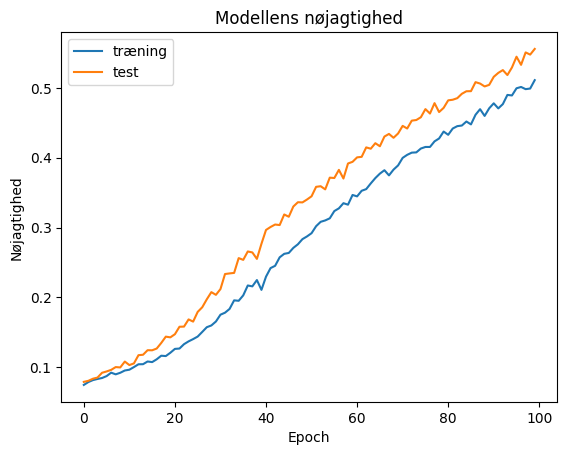

In [9]:
plotAccuracy(epochs=100)

#### Tekstgenerering med den simple model

Til teksgenerering ud fra modellen, skal der foruden den trænede model bruges to ting. Det skal angives hvor mange ord, man gerne vil have genereret, og der skal angives en startsætningen. Startsætnignen skal angives, så modellen har nogle ord, hvorfra den kan forudsige det næste ord.

Nedenfor kan både antallet af ord og startsætning ændres, som man har lyst til.

In [10]:
antal_ord = 100
startsætning = 'Der var engang'

generate_text(100, startsætning, antal_ord)

'sig den tredje tøfler i de knaldede hende og hun sad i vandet og hende der var en virkelig prinsesse tungen ene fjer tornyster og kasket fulde af penge og benet ikke han af kisten og en rigtig soldat ske haglene lød og kasket det samme stod tæt sagde den kunne en sabel ud fra vejret og rør svajede langt forud halehoj sad på bunden på det stod så meget lukkes rundt forud det er ikke tale sagde hun hvad hun det er ganske hult inden på det skal du ikke løbe hen af gulvet kogetøj på hundens dybe svaner'

#### Spørgsmål



*   Hvad sker der, hvis der ændres på længden af teksten?
*   Hvad sker der, hvis der ændres på startsætningen?
*   Giver de generede tekster mening?
*   Hvordan stemmer de generede tekster overens med eventyr?
*   Hvordan afviger de generede tekster fra eventyr?



## 200 epochs

Denne model er trænet i et kvarter og har en nøjagtighed på cirka 80%

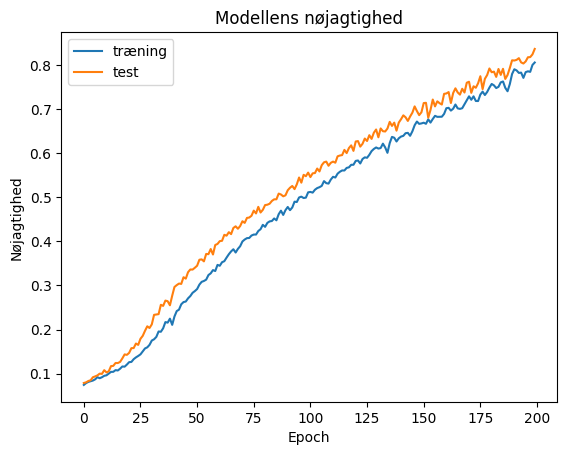

In [11]:
plotAccuracy(epochs=200)

#### Tekstgenerering

Ligesom med den simple model kan I ændre på antal generede ord og startsætningen.

In [12]:
antal_ord = 100
startsætning = 'Der var engang'

generate_text(200, startsætning, antal_ord)

'at svømme om om alle råd tror den stakkels bange og tøfler på dem tog fortræd og oppe i ligesom klare solen som den for var den værste under som var han hest få kom den af sammen hun kaldte de var til hende kom her sad i otte fjer men det tålte ikke ikke ingen ind dyrehavstiden i frøs blev store mose at sidst brugt dem ikke både også når mig hvor lukkede for knagede og svømmer i denne gennemsigtig fik mere end at komme af sted igennem går du vi ikke noget af sted dumpe ned i toppen'

#### Spørgsmål



*   Hvad sker der, hvis der ændres på længden af teksten?
*   Hvad sker der, hvis der ændres på startsætningen?
*   Hvordan er de generede tekster anderledes end ved den simple model?
*   Giver de generede tekster mening nu?
*   Hvordan stemmer de generede tekster overens med eventyr?
*   Hvordan afviger de generede tekster fra eventyr?


## 300 epochs

Denne model er trænet i cirka 25 minutter og har en nøjagtighed på cirka 97%

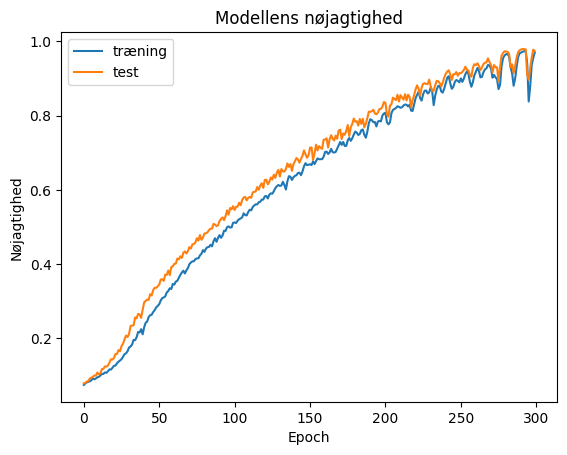

In [13]:
plotAccuracy(epochs=300)

#### Tekstgenerering

Ligesom med den simple model kan I ændre på antal generede ord og startsætningen.

In [23]:
antal_ord = 10
startsætning = 'Der var engang en prins og en prinsesse, der boede på slottet. En dag drog de ud i verden, og'

generate_text(300, startsætning, antal_ord)


[3.8928376e-15 4.9553361e-09 1.5107690e-07 ... 1.4174207e-15 0.0000000e+00
 0.0000000e+00]


[4.3305238e-20 1.4848335e-03 4.2382271e-05 ... 1.8897892e-19 0.0000000e+00
 0.0000000e+00]


[8.8028133e-22 1.0771020e-10 2.2357222e-05 ... 6.8254243e-21 0.0000000e+00
 0.0000000e+00]


[2.1795068e-16 9.6059383e-11 2.0772727e-02 ... 2.9414519e-16 0.0000000e+00
 0.0000000e+00]


[3.6491779e-14 1.7632013e-13 4.8407167e-09 ... 2.3434652e-14 0.0000000e+00
 0.0000000e+00]


[1.3205488e-14 8.3013713e-10 2.5960212e-09 ... 3.6433855e-14 0.0000000e+00
 0.0000000e+00]


[4.2811878e-12 8.4141946e-05 4.7666335e-06 ... 3.8933553e-12 0.0000000e+00
 0.0000000e+00]


[1.5513717e-22 1.4483570e-06 4.2295341e-15 ... 2.0786670e-22 0.0000000e+00
 0.0000000e+00]


[1.0807477e-26 2.6040595e-07 9.4973810e-05 ... 3.1232177e-26 0.0000000e+00
 0.0000000e+00]


[2.4329652e-21 7.1516659e-08 3.9894100e-08 ... 3.7653189e-21 0.0000000e+00
 0.0000000e+00]



'tårne nu kanalen sin grå lange gule hår der ene'

#### Spørgsmål



*   Hvordan stemmer de generede tekster overens med eventyr?
*   Hvordan afviger de generede tekster fra eventyr?
*   Sammenlign de generede tekster.
*   Hvilke muligheder er der ved tekstgenerering?
*   Hvilke udfrodringer er der ved tekstgenerering?
*   Hvad skal man overveje, hvis man bruger eksempelvis ChatGPT til at generere noget tekst for en?